In [2]:
!kaggle --version


Kaggle API 1.7.4.5


In [5]:
!kaggle datasets download -d pranavraikokte/covid19-image-dataset


Dataset URL: https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset
License(s): CC-BY-SA-4.0




  0%|          | 0.00/158M [00:00<?, ?B/s]
 68%|######7   | 107M/158M [00:00<00:00, 1.12GB/s]
100%|##########| 158M/158M [00:00<00:00, 952MB/s] 


In [6]:
import zipfile
import os

zip_path = r"C:\Users\Aarav Phutane\Documents\Aarav Phutane\ML projects\covid19-image-dataset.zip"
extract_to = r"C:\Users\Aarav Phutane\Documents\Aarav Phutane\ML projects\covid19-image-dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction completed!")


Extraction completed!


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import os
import torch
import random
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from torchvision import datasets, transforms, models
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from IPython import display
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as python_random
import tensorflow as tf
import seaborn as sns
import math
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [10]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor()
])

train_dir = r"C:\Users\Aarav Phutane\Documents\Aarav Phutane\ML projects\covid19-image-dataset\Covid19-dataset\train"
test_dir = r"C:\Users\Aarav Phutane\Documents\Aarav Phutane\ML projects\covid19-image-dataset\Covid19-dataset\test"

train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)


print("Classes:", train_dataset.classes)
print("Training samples:", len(train_dataset))
print("Test samples:", len(test_dataset))


Classes: ['Covid', 'Normal', 'Viral Pneumonia']
Training samples: 251
Test samples: 66


In [11]:
print(train_dataset.class_to_idx)


{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}


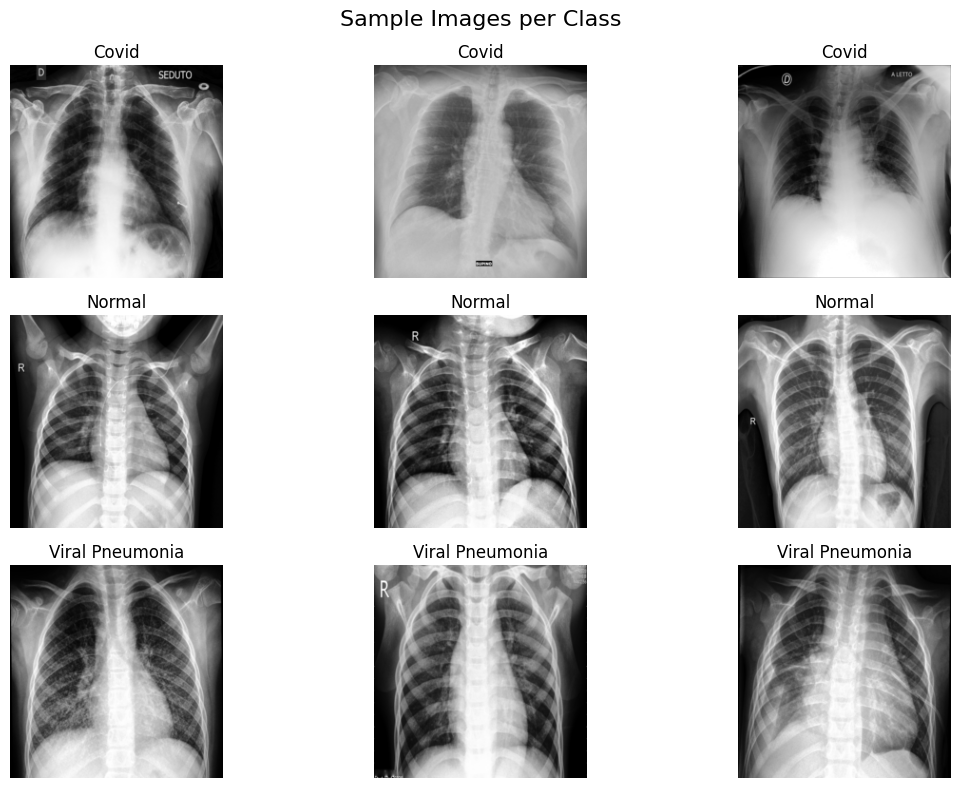

In [13]:
import matplotlib.pyplot as plt
import numpy as np

samples_per_class = 3
class_names = train_dataset.classes
class_counts = {cls: 0 for cls in class_names}

fig, axs = plt.subplots(len(class_names), samples_per_class, figsize=(12, 8))
fig.suptitle('Sample Images per Class', fontsize=16)

idx = 0
for img, label in train_dataset:
    class_name = class_names[label]
    
    if class_counts[class_name] < samples_per_class:
        ax = axs[class_names.index(class_name)][class_counts[class_name]]
        img_np = np.transpose(img.numpy(), (1, 2, 0))
        ax.imshow(img_np)
        ax.axis('off')
        ax.set_title(class_name)
        class_counts[class_name] += 1
        
    if all(v >= samples_per_class for v in class_counts.values()):
        break

plt.tight_layout()
plt.show()


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data augmentation and rescaling for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True,
    zoom_range=0.1,
    shear_range=0.1,
    fill_mode='nearest'
)

# Only rescaling for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Use 'binary' if you only have two classes
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [16]:
import tensorflow as tf

# Define your model first (example: a simple CNN or pretrained model)
model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    weights=None,  # or 'imagenet' if you want to use pretrained weights
    classes=3
)

# Compile the model with optimizer, loss function, and metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Adam optimizer with lr=0.001
    loss='categorical_crossentropy',                          # suitable for multi-class classification
    metrics=['accuracy']
)

# Learning rate scheduler example (Reduce LR on plateau)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',    # monitor validation loss
    factor=0.5,            # reduce LR by factor of 0.5
    patience=3,            # wait 3 epochs before reducing
    verbose=1,
    min_lr=1e-6
)


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # First conv + pooling block
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(2,2)),

    # Second conv + pooling block
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    # Third conv + pooling block
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(3, activation='softmax')  # 3 output classes
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


C:\Users\Aarav Phutane\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=[lr_scheduler]  
)


C:\Users\Aarav Phutane\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.4549 - loss: 2.3285 - val_accuracy: 0.6667 - val_loss: 0.9083 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6152 - loss: 0.8729 - val_accuracy: 0.7273 - val_loss: 0.6248 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7884 - loss: 0.5241 - val_accuracy: 0.7424 - val_loss: 0.4375 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7988 - loss: 0.4772 - val_accuracy: 0.8788 - val_loss: 0.3373 - learning_rate: 0.0010
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8346 - loss: 0.3987 - val_accuracy: 0.8333 - val_loss: 0.3705 - learning_rate: 0.0010
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8240 - loss: 0.4007 - val_accuracy: 0.8636 - val_loss: 0.2996 - learning_rate: 0.0010
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8923 - loss: 0.2857 - val_accuracy: 0.9091 - val_loss:

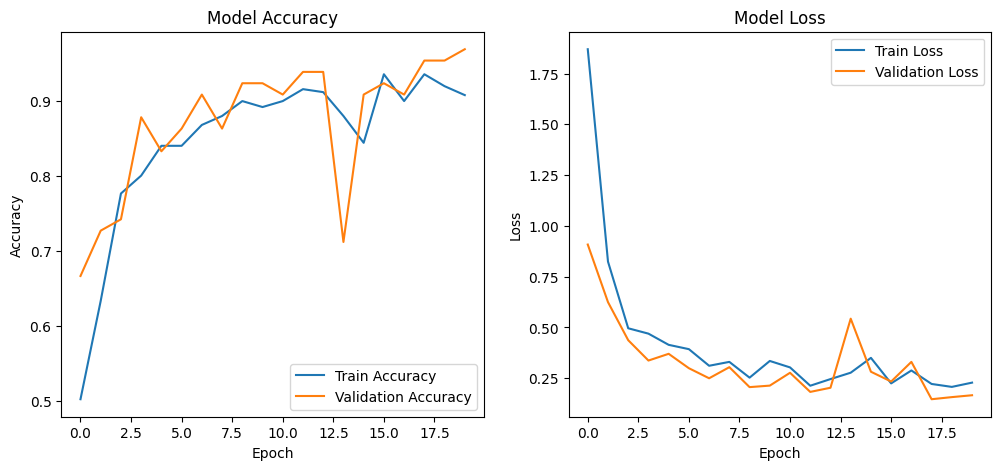

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step - accuracy: 0.9580 - loss: 0.0679
Test Loss: 0.0953
Test Accuracy: 0.9394
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step


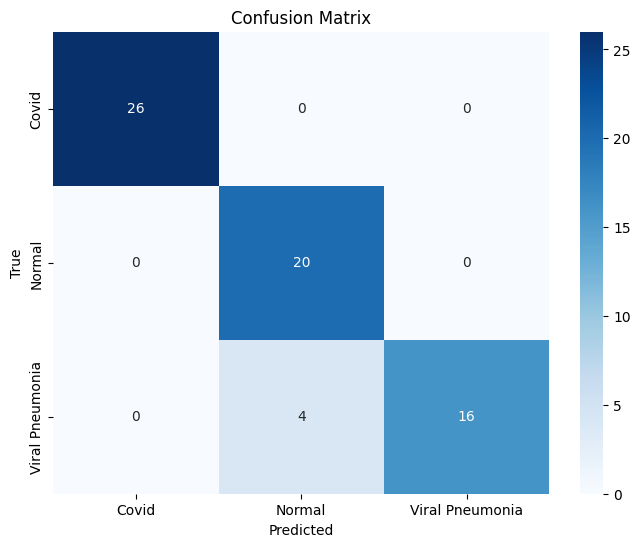

                 precision    recall  f1-score   support

          Covid       1.00      1.00      1.00        26
         Normal       0.83      1.00      0.91        20
Viral Pneumonia       1.00      0.80      0.89        20

       accuracy                           0.94        66
      macro avg       0.94      0.93      0.93        66
   weighted avg       0.95      0.94      0.94        66



In [23]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# 2. Get predictions and true labels
pred_probs = model.predict(test_generator)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# 3. Confusion matrix
cm = confusion_matrix(true_classes, pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 4. Classification report (includes F1-score, precision, recall)
report = classification_report(true_classes, pred_classes, target_names=class_labels)
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


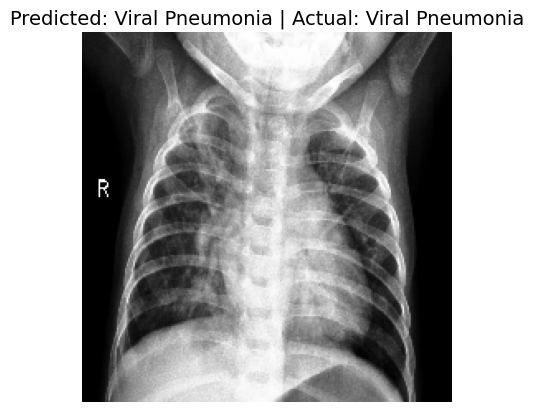

In [30]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_and_compare(img_path, actual_class, model, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # rescale
    img_array_expanded = np.expand_dims(img_array, axis=0)  

    pred_prob = model.predict(img_array_expanded)
    pred_class_idx = np.argmax(pred_prob, axis=1)[0]
    class_labels = list(test_generator.class_indices.keys())
    predicted_class = class_labels[pred_class_idx]

    plt.imshow(img_array)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class} | Actual: {actual_class}", fontsize=14)
    plt.show()

    return predicted_class

img_path = r"C:\Users\Aarav Phutane\Documents\Aarav Phutane\ML projects\pneumonia.jpeg"
actual_class = "Viral Pneumonia"  
predicted_class = predict_and_compare(img_path, actual_class, model)
